## **Installing Modules and Libraries**

In [ ]:
pip install pandas numpy scikit-learn tensorflow seaborn matplotlib

**LINEAR REGRESSION**

Linear regression is a fundamental supervised learning algorithm in machine learning. It aims to establish a linear relationship between a dependent variable (target) and one or more independent variables (features). In the context of house price prediction, the dependent variable will be the house price, and the independent variables can be factors like the size of the house, number of bedrooms, location, etc.

**MACHINE LEARNING PIPELINE FOR HOUSE PRICE PREDICTION**

1. **Dataset Collection:** Gather historical house price data and corresponding features from platforms like Zillow or Kaggle.
2. **Data Preprocessing:** Clean the data, handle missing values, and perform feature engineering, such as converting categorical variables to numerical representations.
3. **Splitting the Dataset:** Divide the dataset into training and testing sets for model building and evaluation.
4. **Building the Model:** Create a linear regression model to learn the relationships between features and house prices.
5. **Model Evaluation:** Assess the model’s performance on the testing set using metrics like MSE or RMSE.
6. **Fine-tuning the Model:** Adjust hyperparameters or try different algorithms to improve the model’s accuracy.
7. **Deployment and Prediction:** Deploy the robust model into a real-world application for predicting house prices based on user inputs.

Importing the Dependencies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load the dataset from CSV
df = pd.read_csv('data.csv')

In [ ]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [ ]:
df.shape

(4600, 18)

Exploratory Data Analysis (EDA)

In [ ]:
# printing the first five rows of the dataset
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
# printing the last five rows of the dataset
df.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [ ]:
# Summary statistics of the dataset
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [ ]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
# Check for missing values
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

Data Encoding

In [ ]:
df['yr_renovated'] = df['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)

df.rename(columns = {'yr_renovated':'renovation'}, inplace = True)

Correlation Matrix

In [ ]:
df = df.drop(axis=1,columns=['date','street','city','statezip','country','yr_built'])

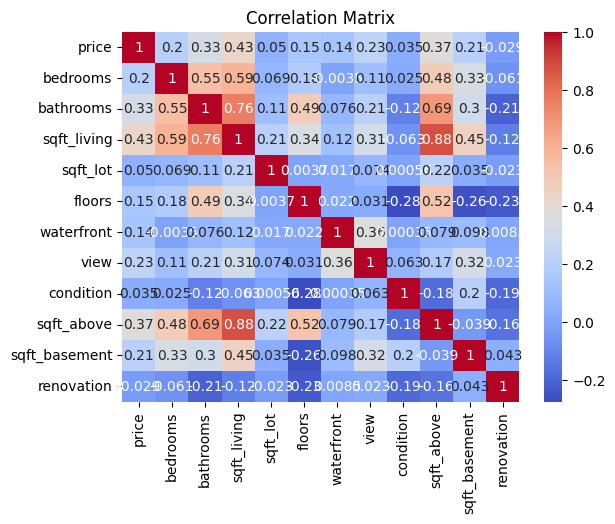

In [ ]:
# Correlation matrix to understand feature relationships
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Data Preprocessing

In [ ]:
# Selecting features and target variable
x = df.drop(axis=1,columns=['price','sqft_above','sqft_basement','renovation','sqft_lot','condition'])
y = df['price']

In [ ]:
# How data looks like before Transformation
x.head()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view
0,3.0,1.50,1340,1.5,0,0
1,5.0,2.50,3650,2.0,0,4
2,3.0,2.00,1930,1.0,0,0
3,3.0,2.25,2000,1.0,0,0
4,4.0,2.50,1940,1.0,0,0


Data Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

x = scale.fit_transform(x)

In [ ]:
print(f'Data Type after transfromation : {type(x)}')

Data Type after transfromation : <class 'numpy.ndarray'>


In [ ]:
# How data looks like after Transformation
x = pd.DataFrame(x) # This step is not necessary

x.head()

,0,1,2,3,4,5
0,0.333333,0.18750,0.073652,0.2,0.0,0.0
1,0.555556,0.31250,0.249051,0.4,0.0,1.0
2,0.333333,0.25000,0.118451,0.0,0.0,0.0
3,0.333333,0.28125,0.123766,0.0,0.0,0.0
4,0.444444,0.31250,0.119210,0.0,0.0,0.0


Splitting dataset into Training and Testing data

In [ ]:
# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
print(f'Size of the data : {x.shape}')
print(f'Size of the training data : {x_train.shape}')
print(f'Size of the testing data : {x_test.shape}')

Size of the data : (4600, 6)
Size of the training data : (3450, 6)
Size of the testing data : (1150, 6)


### **LINEAR REGRESSION MODEL**

Building the Linear Regression Model

In [ ]:
# Building the Linear Regression Model
model = LinearRegression()

In [ ]:
# Fitting the model on the training data
model.fit(x_train, y_train)

LinearRegression()

Model Evaluation

In [ ]:
# Model Evaluation
y_pred = model.predict(x_test)

**MSE (Mean Squared Error)** : average of squares of errors

**RMSE (Root Mean Squared Error)** : root of average of squares of errors

MSE and RMSE help show spread the approximated values  are from the actual mean.

**MSE and RMSE** should be **closer to 0**.

**R2 Score** : Helps understand how closely our model approximates values. Lies between 0 and 1.

**R2 Score** should lie closer to 1.

In [ ]:
# Mean Squared Error and R-squared for model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Linear Regression RMSE:", rmse)
print("Linear Regression MSE:", mse)
print("Linear Regression R-squared:", r2)

Linear Regression RMSE: 898376.7867491037
Linear Regression MSE: 807080850969.6445
Linear Regression R-squared: 0.0418310828673496


Predictions and Visualization

                   This is not a good prediction :(  



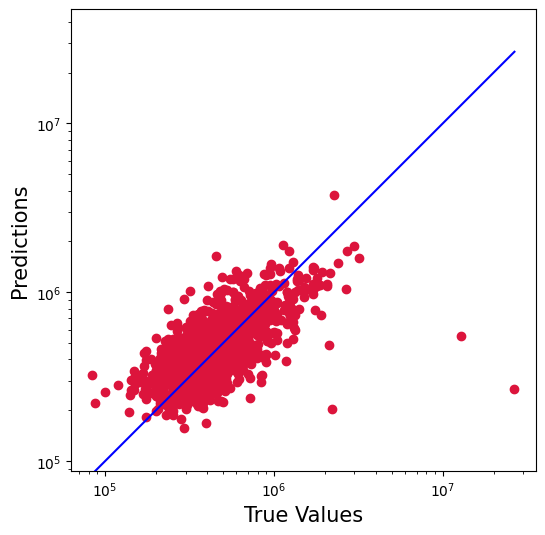

In [ ]:
# Predictions and Visualization
# To visualize the predictions against actual prices, we'll use a scatter plot
print("                   This is not a good prediction :(  \n" )
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

                 This is how a good prediction would look like :) 



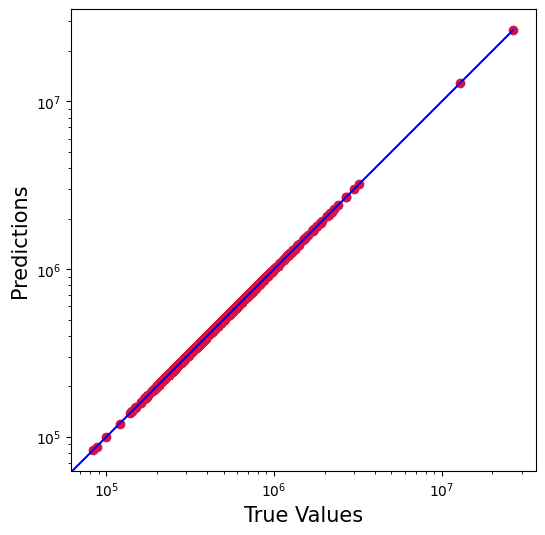

In [ ]:
# This is just for explaination
# There is no sense behind this

print("                 This is how a good prediction would look like :) \n")
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_test), max(y_test))
p2 = min(min(y_test), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

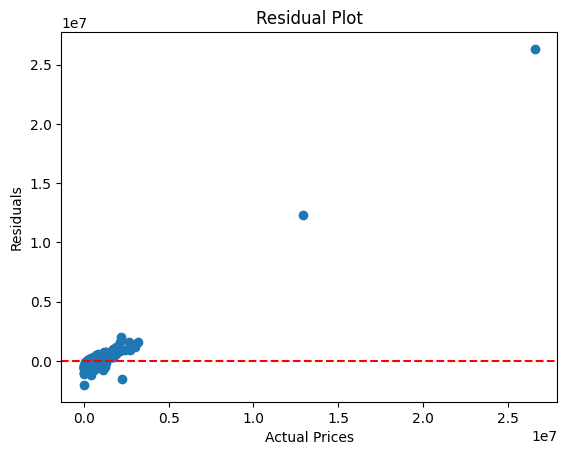

In [ ]:
# We can also create a residual plot to check the model's performance
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

                 This is how a good prediction would look like :) 



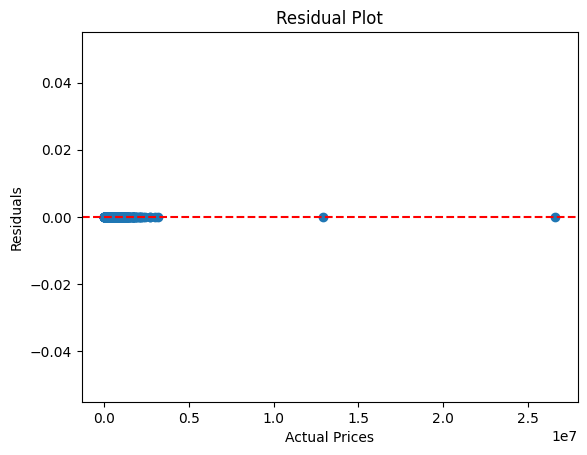

In [ ]:
# This is just for explaination
# There is no sense behind this

print("                 This is how a good prediction would look like :) \n")
residuals = y_test - y_test
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [ ]:
# we will use the trained model to make predictions on new data and visualize the results

# features : bedrooms,bathrooms,sqft_living,floors,waterfront,view

new_data = [[3, 2, 1600, 1, 0, 0]]
predicted_price = model.predict(scale.transform(new_data))

print("Predicted Price:", predicted_price[0])

Predicted Price: 386747.7629630785


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


----------------------

**NEURAL NETWORKS: ANN**

Neural Networks are a technique under Deep Learning which use these three operations:

1. Forward propagation

2. Backpropagation

3. Activation functions

Under the architecture:

- Input Layer

- N Hidden Layers

- Output Layer

Data is fed to a Neural Network in a downward direction such that it passes through Input layer , then Hidden layers and finally Output layer. During each iteration or "Epoch", Data moves in "Forward" direction for processing based on Weights and Biases, worked on by Activation functions to create an activation response or "nerve stimulation", and finally "Back-propagated" for weight-bias updation for better approximation using an "Optimizing function", while the error is monitored using the "Loss function" for model behoaviour.

Importing Dependencies

In [ ]:
import keras
from keras.layers import Dense

Building the Artificial Neural Network model

In [ ]:
# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

Layer addition formula : model.add(type of layer(number of neurons, activation = __ , input_dim = __ )) wherein input_dim argument is for input layer only.

In [ ]:
model = keras.models.Sequential() # creating a model object

model.add(Dense(10, activation='relu',input_dim = 6)) # input layer
model.add(Dense(20, activation='relu')) # hidden layer
model.add(Dense(40, activation='relu'))
model.add(Dense(1,activation = 'linear')) # output layer
model.compile(loss = 'mean_squared_error',optimizer = 'adam')

model.summary() # gives a summary of the architecture

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                70        
                                                                 
 dense_5 (Dense)             (None, 20)                220       
                                                                 
 dense_6 (Dense)             (None, 40)                840       
                                                                 
 dense_7 (Dense)             (None, 1)                 41        
                                                                 
Total params: 1171 (4.57 KB)
Trainable params: 1171 (4.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


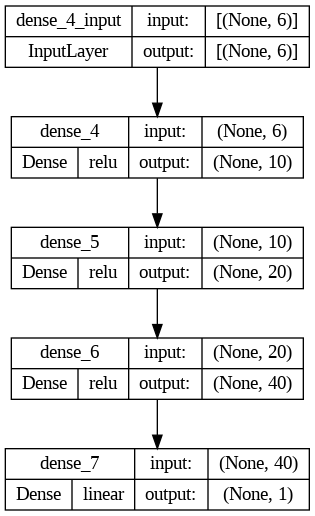

In [ ]:
keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
    show_trainable=False
)

In [ ]:
history = model.fit(x_train,y_train,epochs=100,validation_split=0.15) # fitting data to model for training

Epoch 1/100
104/104 [==============================] - 3s 9ms/step - loss: 653400539136.0000 - val_loss: 402941378560.0000
Epoch 2/100
104/104 [==============================] - 1s 6ms/step - loss: 653336182784.0000 - val_loss: 402769182720.0000
Epoch 3/100
104/104 [==============================] - 1s 6ms/step - loss: 652820873216.0000 - val_loss: 401796202496.0000
Epoch 4/100
104/104 [==============================] - 0s 4ms/step - loss: 650867703808.0000 - val_loss: 398778695680.0000
Epoch 5/100
104/104 [==============================] - 0s 4ms/step - loss: 646005587968.0000 - val_loss: 392130887680.0000
Epoch 6/100
104/104 [==============================] - 0s 4ms/step - loss: 636355149824.0000 - val_loss: 379982839808.0000
Epoch 7/100
104/104 [==============================] - 0s 4ms/step - loss: 620199018496.0000 - val_loss: 361028124672.0000
Epoch 8/100
104/104 [==============================] - 0s 4ms/step - loss: 596324122624.0000 - val_loss: 334115831808.0000
Epoch 9/100
104/

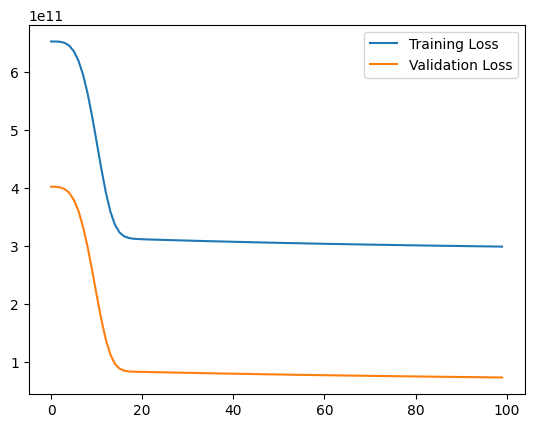

In [ ]:
plt.plot(history.history['loss'], label='Training Loss') # plotting training and validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(x_test) # predicting on testing data

22/22 [==============================] - 0s 2ms/step


Predictions and Visualization

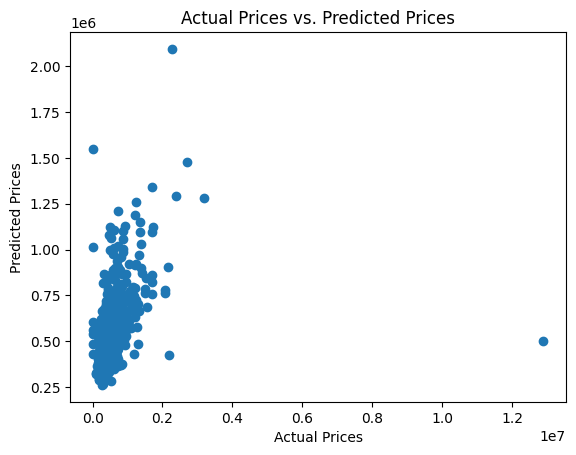

In [ ]:
# To visualize the predictions against actual prices, we'll use a scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

Model Evaluation

In [ ]:
# Mean Squared Error and R-squared for model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("ANN RMSE:", rmse)
print("ANN MSE:", mse)
print("ANN R-squared:", r2)

ANN RMSE: 550039.5822673787
ANN MSE: 302543542060.87244
ANN R-squared: 0.11848765484246582


Price prediction

In [ ]:
# we will use the trained model to make predictions on new data and visualize the results

# features : bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition

new_data = [[3, 2, 1600, 1, 0, 0]]
predicted_price = model.predict(scale.transform(new_data))

print("Predicted Price:", predicted_price[0])

1/1 [==============================] - 0s 95ms/step
Predicted Price: [443651.84]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
